In [40]:
#ml 1 eda
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem1.csv")

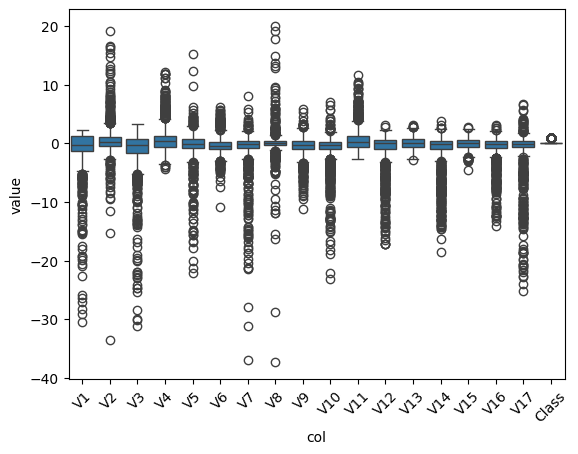

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

X=df.copy().drop(columns=['Time','Amount'])
y=df['Amount']
df_v1=pd.melt(X,var_name='col',value_name='value')
plt.figure()
sns.boxplot(x='col',y='value',data=df_v1)
plt.xticks(range(len(X.columns)),X.columns,rotation=45)
plt.show()# ÎßéÏùÄ Ïù¥ÏÉÅÏπò Î∂ÄÎ∂ÑÏù¥ ÏÇ¨Í∏∞ Î∂ÄÎ∂ÑÏùºÍ±∞ÎùºÎ≥¥ÏûÑ

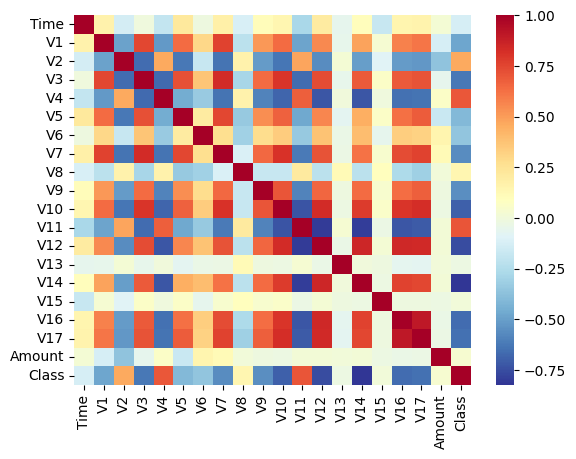

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig,ax= plt.subplots()

sns.heatmap(df.corr(),cmap='RdYlBu_r')
plt.show()

In [43]:
df['Class'].value_counts()
# Î∂àÍ∑†ÌòïÏúºÎ°ú Ïò§Î≤Ñ/Ïñ∏Îçî ÏÉòÌîåÎßÅ ÌïÑÏöî 
# Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Îäî Ï†ÑÎ¨∏Í∞Ä ÎÜÄÎ¶¨ÏßÄ ÌïÑÏöî
# amountÎäî Îã§Î•∏ Í±∞Îûë Ïä§ÏºÄÏùºÏ∞®Ïù¥Í∞Ä Ïª§ÏÑú Ïä§ÏºÄÏùºÎßÅÏù¥ ÌïÑÏöØ

Class
0    993
1    200
Name: count, dtype: int64

In [44]:
# #2-1 Ï∞®Ïõê Ï∂ïÏÜå Î∞©Î≤ï 2Í∞ÄÏßÄ Ïù¥ÏÉÅÏùÑ ÎπÑÍµêÌïòÍ≥† ÌïúÍ∞ÄÏßÄÎ•º ÏÑ†ÌÉùÌïòÏãúÏò§
# FA. ÏöîÏù∏Î∂ÑÏÑù Ïú†ÏÇ¨Ìïú Ìï≠Î™©Îì§ÎÅºÎ¶¨ Î¨∂Ïñ¥ÏÑú Ï≤òÎ¶¨ÌïòÎäî Í∏∞Î≤ï, Ïù¥ÎïåÎäî ÎèÖÎ¶Ω Î≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàòÏùò Í∞úÎÖêÏù¥ ÏóÜÏúºÎ©∞, Î™®Îì† Î≥ÄÏàòÎì§ Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌï®ÏúºÎ°úÏç® Í≥µÌÜµÏöîÏù∏ „ÖÇÏùÑ Î∂ÑÏÑùÍ∞ÄÏùò ÌåêÎã®ÏúºÎ°ú Î¨∂Ïñ¥ÏÑú Ï≤òÎ¶¨Ìï†Ïàò ÏûàÎã§.
# PCA Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑù ÏÉÅÏÜ¨ÏÑ±Ïù¥ ÎÜíÏùÄ Î≥ÄÏàòÎì§Ïùò ÏÑ†ÌòïÍ≤∞Ìï©ÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ Ï£ºÏÑ±Î∂ÑÏù¥ÎùºÎäî „ÖÖÌï¥Î°úÏö¥ Î≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ ÏöîÏïΩÌïòÍ≥† Ï∂ïÏÜåÌïòÎäî Í∏∞Î≤ïÏù¥Îã§. Î≥ÄÏàòÎì§Ïùò ÏÑ±Í≤©ÏùÑ Ïïå Ïàò ÏóÜÎäî Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Ïóê Ïñ¥Ïö∏Î¶¨Îäî Î∂ÑÏÑùÏùÄ pca Ïù¥Îã§.

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1),copy=True)
scaled_amount=scaler.fit_transform(df[['Amount']])
df['Scaled_Amount']=scaled_amount

In [45]:
features=df.columns.drop(['Time','Class','Amount'])

In [46]:
from sklearn.decomposition import PCA

pca=PCA(n_components=len(features))
pca_fit=pca.fit(df[features])
print("Í≥†Ïú†Í∞í",pca_fit.singular_values_)
print("Î∂ÑÏÇ∞ÏÑ§Î™ÖÎ†•",pca_fit.explained_variance_ratio_)

Í≥†Ïú†Í∞í [313.34445642 108.1494526   88.31656842  75.95550775  74.04174398
  54.38022362  48.53052166  44.43119733  42.88301542  41.22188826
  40.02461796  37.7240559   35.89894925  34.29952844  33.25124613
  30.10449767  28.27817612   2.39049112]
Î∂ÑÏÇ∞ÏÑ§Î™ÖÎ†• [6.63121024e-01 7.89946023e-02 5.26784682e-02 3.89643386e-02
 3.70255949e-02 1.99724225e-02 1.59066485e-02 1.33329054e-02
 1.24199371e-02 1.14763697e-02 1.08193995e-02 9.61137507e-03
 8.70386688e-03 7.94557011e-03 7.46731749e-03 6.12084716e-03
 5.40071868e-03 3.85942881e-05]


In [47]:
pca_fit.singular_values_**2/np.sum(pca_fit.singular_values_**2)

array([6.63121024e-01, 7.89946023e-02, 5.26784682e-02, 3.89643386e-02,
       3.70255949e-02, 1.99724225e-02, 1.59066485e-02, 1.33329054e-02,
       1.24199371e-02, 1.14763697e-02, 1.08193995e-02, 9.61137507e-03,
       8.70386688e-03, 7.94557011e-03, 7.46731749e-03, 6.12084716e-03,
       5.40071868e-03, 3.85942881e-05])

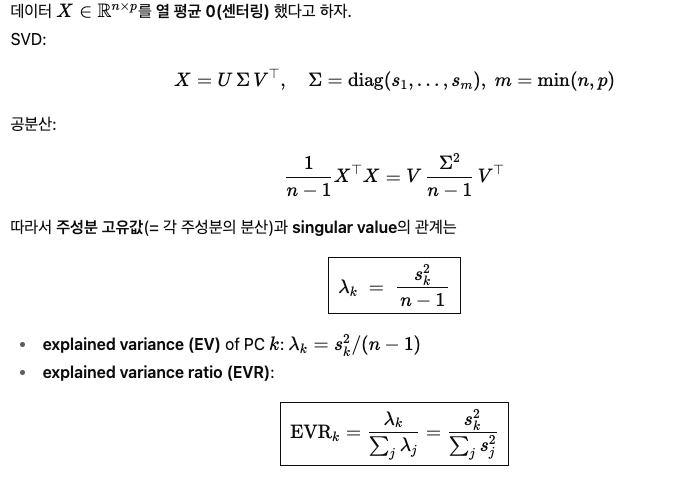
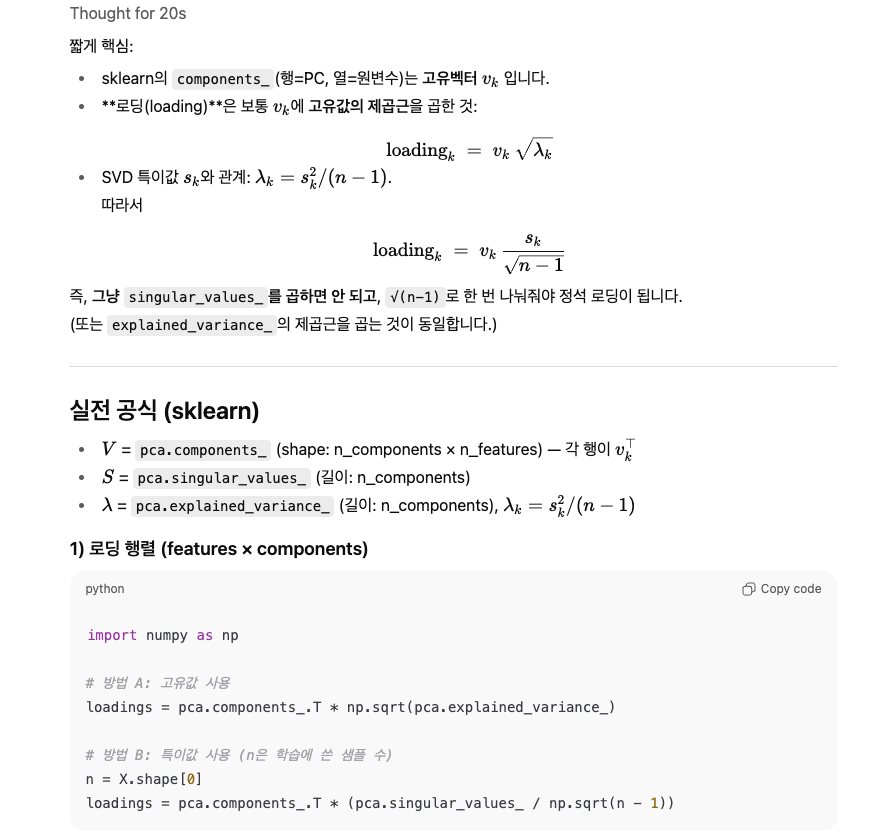

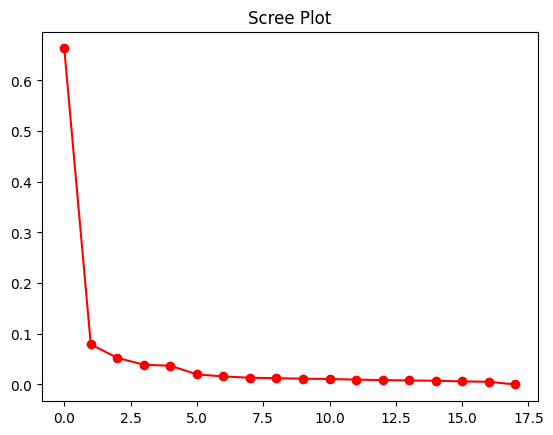

In [48]:
import matplotlib.pyplot as plt
plt.title('Scree Plot')
plt.plot(pca.explained_variance_ratio_,'ro-')

In [49]:
print('Ï£ºÏÑ±Î∂Ñ 3Í∞ú',np.sum(pca_fit.explained_variance_ratio_[:3]))
print('Ï£ºÏÑ±Î∂Ñ 9Í∞ú',np.sum(pca_fit.explained_variance_ratio_[:9]))

Ï£ºÏÑ±Î∂Ñ 3Í∞ú 0.7947940941729138
Ï£ºÏÑ±Î∂Ñ 9Í∞ú 0.9324159411774043


In [50]:
#3-1 Ïò§Î≤ÑÏÉòÌîåÎßÅÍ≥º Ïñ∏Îçî ÏÉòÌîåÎßÅÏùò Ïû•Îã®Ï†ê ÎπÑÍµê
# Ïñ∏Îçî ÏÉòÌîåÎßÅ Ìï†Îïê Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏù¥ ÎÇ†ÎùºÍ∞ÄÎãàÍπê Ïò§Î≤ÑÏÉòÌîåÎßÅ Ìï†ÎìØ

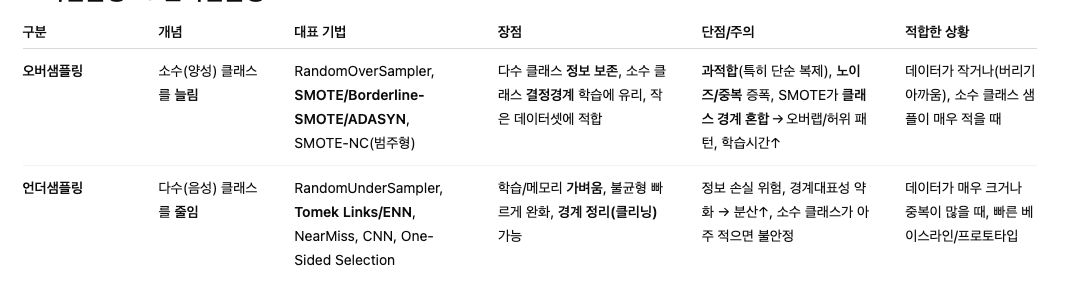

In [51]:
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# 1) Tomek LinksÎßå ÏÇ¨Ïö©(Ïñ∏ÎçîÏÉòÌîå/ÌÅ¥Î¶¨Îãù)
tl = TomekLinks(sampling_strategy="majority")  # "majority"Îßå Ï†úÍ±∞ (Í∏∞Î≥∏Ï†Å ÏÑ†ÌÉù)
# tl = TomekLinks(sampling_strategy="all")     # ÏñëÏ™Ω Î™®Îëê Ï†úÍ±∞(ÌÅ¥Î¶¨Îãù Í∞ïÌôî)
X=df[features]
y=df['Class']
X_tl, y_tl = tl.fit_resample(X, y)
X_stl, y_stl = SMOTETomek(random_state=42).fit_resample(X,y)
# 2) Ïò§Î≤ÑÏÉòÌîåÎßÅÍ≥º Ìï®Íªò(Í∂åÏû• Ï°∞Ìï©)
pipe = Pipeline([
    ("smote_tomek", SMOTETomek(random_state=42)),  # SMOTE(Ïò§Î≤Ñ) + Tomek(ÌÅ¥Î¶¨Îãù)
    ("clf", RandomForestClassifier(random_state=42))
])
pipe.fit(X, y)
# Ïñ∏Ï†ú Ïì∞Î©¥ Ï¢ãÏïÑ?

# Í≤ΩÍ≥ÑÍ∞Ä Îì§Ï≠âÎÇ†Ï≠âÌïòÍ±∞ÎÇò ÎÖ∏Ïù¥Ï¶àÍ∞Ä ÎßéÏïÑ Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎ•º Ï†ïÎ¶¨ÌïòÍ≥† Ïã∂ÏùÑ Îïå
# SMOTE Í∞ôÏùÄ Ïò§Î≤ÑÏÉòÌîåÎßÅ Ï†Ñ/ÌõÑÏóê Í≤ΩÍ≥Ñ ÌÅ¥Î¶¨ÎãùÏúºÎ°ú Ï°∞Ìï©Ìï† Îïå
# (ÎåÄÌëú Ï°∞Ìï©: SMOTE+Tomek = SMOTETomek, SMOTE+ENN)
# Îã®Ï†ê/Ï£ºÏùò
# ÏÉòÌîåÏùÑ ÎäòÎ¶¨ÏßÄ ÏïäÏúºÎØÄÎ°ú Î∂àÍ∑†Ìòï ÎπÑÏú® ÏûêÏ≤¥Îäî ÌÅ¨Í≤å Í∞úÏÑ†ÎêòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏùå
# ÌÅ¥ÎûòÏä§Í∞Ä ÎßéÏù¥ Í≤πÏπòÎ©¥ Îã§Ïàò ÏÉòÌîåÏùÑ Í≥ºÎèÑÌïòÍ≤å ÏÇ≠Ï†úÌï¥ ÏÑ±Îä•Ïù¥ Îñ®Ïñ¥Ïßà Ïàò ÏûàÏùå
# Í≥†Ï∞®ÏõêÏóêÏÑú 1-NN ÌíàÏßàÏù¥ Îñ®Ïñ¥ÏßÄÎ©¥ Ìö®Í≥ºÍ∞Ä ÏïΩÌï¥Ïßê

Pipeline(steps=[('smote_tomek', SMOTETomek(random_state=42)),
                ('clf', RandomForestClassifier(random_state=42))])

In [52]:
print(y.value_counts())
print(y_tl.value_counts())
print(y_stl.value_counts())

Class
0    993
1    200
Name: count, dtype: int64
Class
0    987
1    200
Name: count, dtype: int64
Class
0    992
1    992
Name: count, dtype: int64


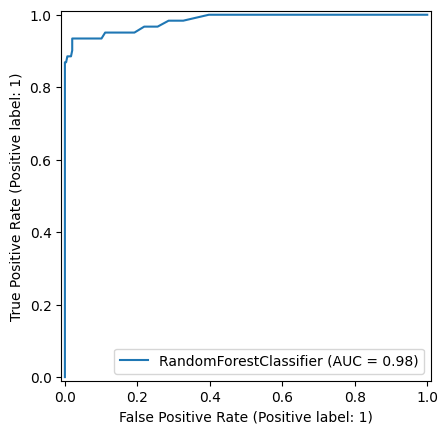

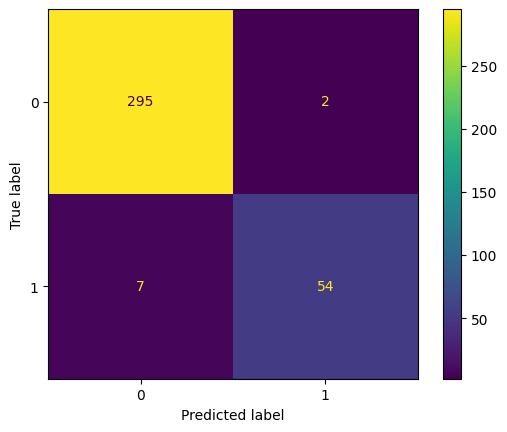

In [53]:
#3-2 Î∂ÑÎ•ò Î∂ÑÏÑù Íµ¨ÌòÑ Î∞è ÏúÑÏóêÏÑú ÏÑ†ÌÉùÌïú ÏÉòÌîåÎßÅ Í∏∞Î≤ïÏ§ë 2Í∞ÄÏßÄ Ïù¥ÏÉÅÏùò ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú Î™®Îç∏ÏùÑ ÎπÑÍµêÌïòÍ≥† ÏÑ±Îä•ÏùÑ Ï∏°Ï†ïÌïòÏãúÏò§
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
X=df[features]
y=df['Class']
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.3,random_state=23)
clf=RandomForestClassifier(random_state=32)
clf.fit(X_train,Y_train)
RocCurveDisplay.from_estimator(clf,X_test,Y_test)
# AUC Í∞íÏù¥ 0.96ÏúºÎ°ú ÍµâÏû•Ìûà Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Í≥† ÏûàÎã§. ÎÜíÏùÑ ÏàòÎ°ù Î™®Îç∏Ïù¥ ÏÇ¨Í∏∞ ÏôÄ „Ñ∑Ï†ïÏÉÅÏùÑ Ïûò Íµ¨Î∂ÑÌïúÎã§Îäê,„Ñ¥ Í≤É. 
# Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†ÌòïÏù¥ ÏûàÏùÑ Í≤ΩÏö∞ Î™®Îì† „ÖàÎç∞Ïù¥ÌÑ∞Î•º Ï†ïÏÉÅÏúºÎ°ú Î∂ÑÎ•òÌïòÏó¨ÎèÑ auc Ïùò Í∞íÏùÄ ÎÜíÏïÑÏßÄÍ≤å ÎêúÎã§. 
# Í∑∏Îü¨ÎØÄÎ°ú Ïò§Î≤Ñ ÏÉòÌîåÎßÅ Ïñ∏Îçî ÏÉòÌîåÎßÅÏùÑ ÌïòÏó¨ Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÎ•º ÏÇ¥Ìé¥Î≥ºÌïÑÏöîÍ∞Ä ÏûàÎã§.
ConfusionMatrixDisplay.from_predictions(Y_test,clf.predict(X_test))


In [54]:
print(classification_report(Y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.96      0.89      0.92        61

    accuracy                           0.97       358
   macro avg       0.97      0.94      0.95       358
weighted avg       0.97      0.97      0.97       358



              precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.93      0.90      0.92        61

    accuracy                           0.97       358
   macro avg       0.96      0.94      0.95       358
weighted avg       0.97      0.97      0.97       358



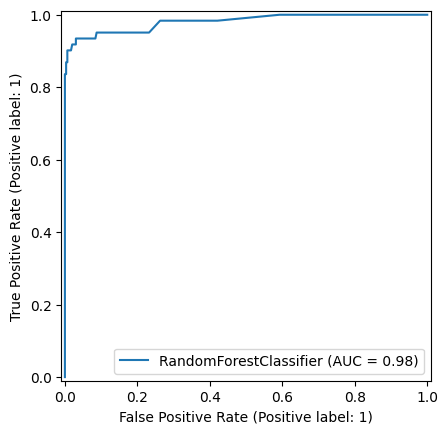

In [55]:
#ÏÉòÌîåÎßÅ Í∏∞Î≤ï 2Í∞ú Îã§Ï†ÅÏö© ÎπÑÍµê 

from imblearn.over_sampling import RandomOverSampler, SMOTE

X_resampled,Y_resampled = RandomOverSampler(random_state=1).fit_resample(X_train,Y_train)
clf_re=RandomForestClassifier(random_state=0)
clf_re.fit(X_resampled,Y_resampled)
print(classification_report(Y_test,clf_re.predict(X_test)))
RocCurveDisplay.from_estimator(clf_re,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       297
           1       0.92      0.92      0.92        61

    accuracy                           0.97       358
   macro avg       0.95      0.95      0.95       358
weighted avg       0.97      0.97      0.97       358



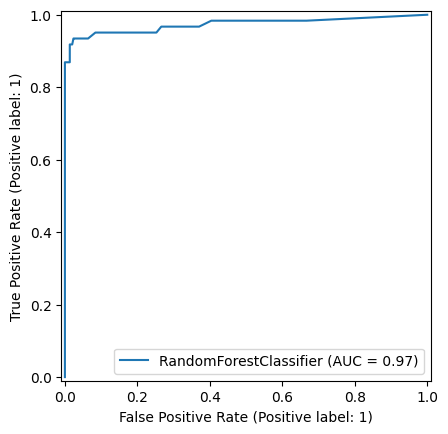

In [56]:
#ÏÉòÌîåÎßÅ Í∏∞Î≤ï 2Í∞ú Îã§Ï†ÅÏö© ÎπÑÍµê 
X_resampled,Y_resampled = SMOTE(k_neighbors=5,random_state=1).fit_resample(X_train,Y_train)
clf_re=RandomForestClassifier(random_state=0)
clf_re.fit(X_resampled,Y_resampled)
print(classification_report(Y_test,clf_re.predict(X_test)))
RocCurveDisplay.from_estimator(clf_re,X_test,Y_test)

In [57]:
#4 Ïù¥ÏÉÅÌÉêÏßÄÎ™®Îç∏ 2Í∞ÄÏßÄ Ïù¥ÏÉÅ ÏÑúÏà†ÌïòÍ≥† Í∏∞Ïà† Ïû•Îã®Ï†êÏùÑ ÏÑ§Î™ÖÌïòÏãúÏò§

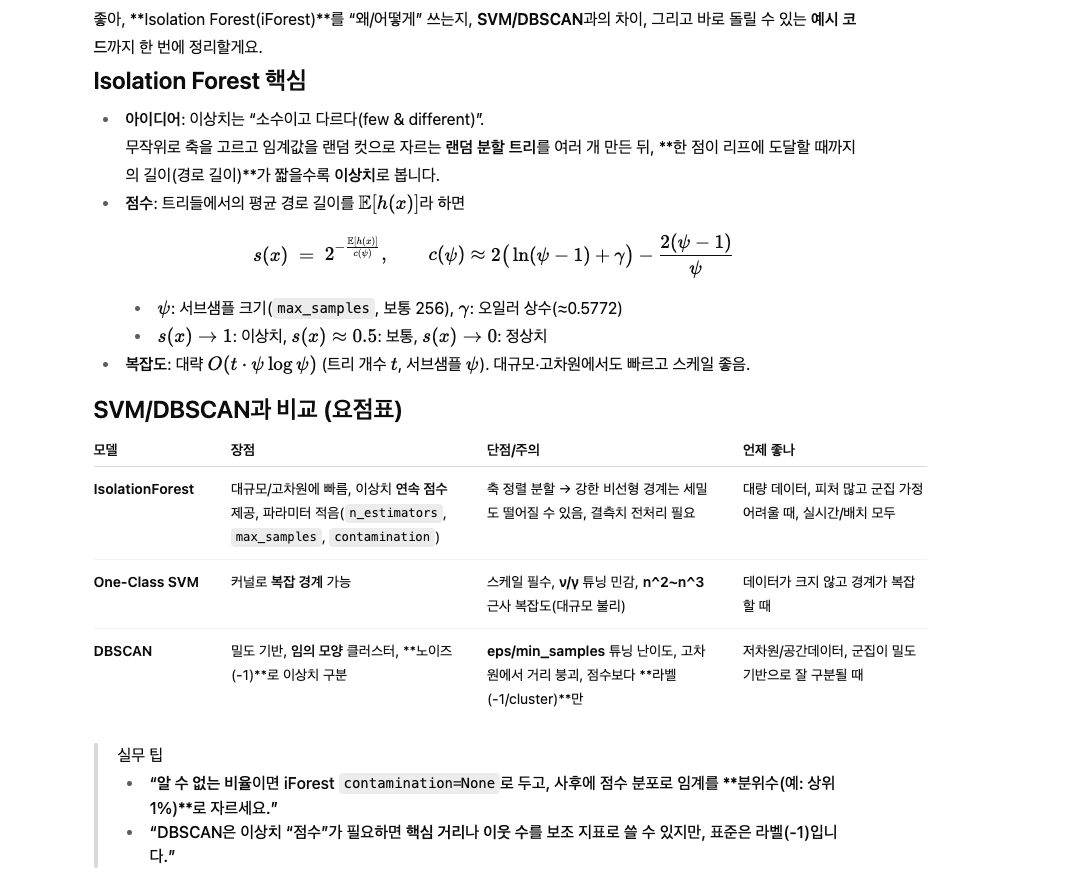

In [58]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# ÏòàÏãú Îç∞Ïù¥ÌÑ∞: Ï†ïÏÉÅ 2Í∞ú Íµ∞Ïßë + ÏÜåÏàòÏùò Ïù¥ÏÉÅÏπò
rng = np.random.RandomState(42)
X_normal = np.r_[rng.normal([0,0], 0.6, size=(600,2)),
                 rng.normal([4,4], 0.6, size=(400,2))]
X_out = rng.uniform(low=-6, high=8, size=(30,2))
X = np.vstack([X_normal, X_out])
y_true = np.hstack([np.zeros(len(X_normal), dtype=int), np.ones(len(X_out), dtype=int)])  # 1=Ïù¥ÏÉÅÏπò

# ---- 1) Isolation Forest ----
iso = IsolationForest(
    n_estimators=200,
    max_samples=256,         # ÏÑúÎ∏åÏÉòÌîå ÌÅ¨Í∏∞(Í∏∞Î≥∏ 256)
    contamination=0.03,      # Ïù¥ÏÉÅÏπò ÎπÑÏú® Ï∂îÏ†ïÏπò (Î™®Î•¥Î©¥ NoneÎ°ú ÎëêÍ≥† Îî∞Î°ú ÏûÑÍ≥Ñ ÏÑ§Ï†ï)
    random_state=42,
    n_jobs=-1,
)
iso.fit(X)
pred_iso = iso.predict(X)              # {1: Ï†ïÏÉÅ, -1: Ïù¥ÏÉÅ}
score_iso = -iso.decision_function(X)  # ÌÅ¥ÏàòÎ°ù Ïù¥ÏÉÅÏπò
y_pred_iso = (pred_iso == -1).astype(int)

print("[IsolationForest]")
print(classification_report(y_true, y_pred_iso, digits=3))

# ---- 2) One-Class SVM ----
scaler = StandardScaler()   # Ïä§ÏºÄÏùº Í∞ïÏ∂î
Xz = scaler.fit_transform(X)
ocsvm = OneClassSVM(kernel="rbf", gamma="scale", nu=0.03)  # nu‚âàÏù¥ÏÉÅÏπò ÏÉÅÌïú
ocsvm.fit(Xz)
pred_svm = ocsvm.predict(Xz)            # {1: Ï†ïÏÉÅ, -1: Ïù¥ÏÉÅ}
y_pred_svm = (pred_svm == -1).astype(int)

print("[OneClassSVM]")
print(classification_report(y_true, y_pred_svm, digits=3))

# ---- 3) DBSCAN (Ïù¥ÏÉÅÏπò = noise = -1) ----
# eps/min_samplesÎäî Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÏóê ÎØºÍ∞ê ‚Üí Î≥¥ÌÜµ ÌëúÏ§ÄÌôî ÌõÑ ÌäúÎãù
db = DBSCAN(eps=0.4, min_samples=5)     # Í∞íÏùÄ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å Ï°∞Ï†ï
lab = db.fit_predict(Xz)                 # {0,1,2,..., -1: Ïù¥ÏÉÅÏπò}
y_pred_db = (lab == -1).astype(int)

print("[DBSCAN]")
print(classification_report(y_true, y_pred_db, digits=3))

# ÏûÑÍ≥ÑÍ∞íÏùÑ ÏàòÎèôÏúºÎ°ú Ï†ïÌïòÍ≥† Ïã∂ÏùÑ Îïå (contamination Î™®Î•º Îïå)
iso_nc = IsolationForest(contamination='auto', random_state=0).fit(X)
scores = -iso_nc.decision_function(X)
# ÏÉÅÏúÑ 2%Î•º Ïù¥ÏÉÅÏπòÎ°ú:
thr = np.quantile(scores, 0.98)
y_pred_custom = (scores >= thr).astype(int)



[IsolationForest]
              precision    recall  f1-score   support

           0      0.994     0.993     0.993      1000
           1      0.774     0.800     0.787        30

    accuracy                          0.987      1030
   macro avg      0.884     0.897     0.890      1030
weighted avg      0.988     0.987     0.987      1030

[OneClassSVM]
              precision    recall  f1-score   support

           0      0.992     0.991     0.991      1000
           1      0.710     0.733     0.721        30

    accuracy                          0.983      1030
   macro avg      0.851     0.862     0.856      1030
weighted avg      0.984     0.983     0.984      1030

[DBSCAN]
              precision    recall  f1-score   support

           0      0.991     0.999     0.995      1000
           1      0.955     0.700     0.808        30

    accuracy                          0.990      1030
   macro avg      0.973     0.849     0.901      1030
weighted avg      0.990     0.990

In [59]:
# eps (Œµ): Î∞òÍ≤Ω. Ìïú Ï†êÏùò Œµ-Ïù¥ÏõÉ(Í∑∏ Ïõê Ïïà)Ïóê Î™á Í∞úÎÇò Ïù¥ÏõÉÏù¥ ÏûàÎäêÎÉêÎ•º Î≥º Îïå Ïì∞Îäî Í±∞Î¶¨ ÏûÑÍ≥ÑÍ∞í.
# min_samples (minPts): **ÌïµÏã¨Ï†ê(core)**Î°ú Ïù∏Ï†ïÎ∞õÍ∏∞ ÏúÑÌïú ÏµúÏÜå Ïù¥ÏõÉ Ïàò(ÏûêÍ∏∞ ÏûêÏã† Ìè¨Ìï®).
# scikit-learn DBSCANÏùò Í∏∞Î≥∏ÏùÄ metric='euclidean'Ïù¥ÎùºÎ©¥ Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ Î∞òÍ≤ΩÏù¥ÏóêÏöî. ÌïòÏßÄÎßå metricÏùÑ Î∞îÍæ∏Î©¥ epsÏùò ÏùòÎØ∏/Îã®ÏúÑÎèÑ Í∑∏ Í±∞Î¶¨ Ï†ïÏùòÏóê ÎßûÍ≤å Î∞îÎÄùÎãàÎã§.
# Í±∞Î¶¨Î≥ÑÎ°ú epsÍ∞Ä ÏùòÎØ∏ÌïòÎäî Í≤É
# Euclidean (Í∏∞Î≥∏):
# d(x,y)=‚à•x‚àíy‚à•
# StandardScaler()Î°ú ÌëúÏ§ÄÌôîÌñàÎã§Î©¥ eps‚âà0.3~1.5 Í∞ôÏùÄ Î¨¥Îã®ÏúÑ Í∞íÏúºÎ°ú ÌäúÎãùÌï©ÎãàÎã§(Îç∞Ïù¥ÌÑ∞ÎßàÎã§ Îã§Î¶Ñ).
# Minkowski(p=1,2,‚Ä¶): metric='minkowski', p=1ÏùÄ Îß®Ìï¥Ìäº, p=2Îäî Ïú†ÌÅ¥Î¶¨Îìú. epsÎäî Ìï¥Îãπ Í±∞Î¶¨Ïùò Î∞òÍ≤Ω.
# Cosine: ùëëcos‚Å°(ùë•,ùë¶)=1‚àícos‚Å°ùúÉdcos	‚Äã
# (x,y)=1‚àícosŒ∏. eps=0.1 ‚Üî ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ‚â• 0.9 Í∑ºÏ≤òÎùºÎäî Îúª. (Î≤îÏúÑ ÎåÄÎûµ 0~2, Î≥¥ÌÜµ 0Ïóê Í∞ÄÍπåÏö¥ Í∞í ÏÇ¨Ïö©)
# precomputed: ÏûÖÎ†•Ïù¥ Í±∞Î¶¨ÌñâÎ†¨Ïù¥Î©¥ epsÎäî Í∑∏ ÌñâÎ†¨ Í∞í(Í±∞Î¶¨)Ïóê ÎåÄÌïú ÏûÑÍ≥ÑÏπò Í∑∏ÎåÄÎ°ú.
# Haversine(ÏúÑÍ≤ΩÎèÑ): Í±∞Î¶¨ Îã®ÏúÑÍ∞Ä ÎùºÎîîÏïà. ÏúÑÍ≤ΩÎèÑÎ•º ÎùºÎîîÏïàÏúºÎ°ú ÎÑ£Í≥†,
# eps = (ÏõêÌïòÎäî_km / ÏßÄÍµ¨Î∞òÍ≤Ω_km) Ïòà) 1km ‚Üí eps ‚âà 1/6371 ‚âà 0.000157.
# Ïã§Î¨¥ ÌåÅ
# Ïä§ÏºÄÏùºÎßÅ ÌïÑÏàò: ÌîºÏ≤ò Îã®ÏúÑÍ∞Ä Îã§Î•¥Î©¥ Ïú†ÌÅ¥Î¶¨Îìú Í∏∞Ï§ÄÏùò epsÍ∞Ä Î¨¥ÏùòÎØ∏Ìï¥Ï†∏Ïöî. Î≥¥ÌÜµ StandardScalerÎ°ú ÌëúÏ§ÄÌôî ÌõÑ ÌäúÎãù.
# k-Í±∞Î¶¨ ÌîåÎ°ØÏúºÎ°ú eps Ï¥àÍ∏∞Í∞í: k=min_samplesÎ°ú k-NNÏùò kÎ≤àÏß∏ Í±∞Î¶¨Îì§ÏùÑ Ï†ïÎ†¨Ìï¥ ÏóòÎ≥¥Ïö∞ ÏßÄÏ†ê ÏÑ†ÌÉù.
# Í≥†Ï∞®Ïõê/ÌÖçÏä§Ìä∏ Îì±ÏùÄ cosineÏù¥ Îçî ÎÇ´Í∏∞ÎèÑ Ìï©ÎãàÎã§.

features.drop("Scaled_Amount")
df_sample=df.sample(n=500)
df_sample=df_sample.drop(df_sample[df_sample["Class"]==1].index)
df_outlier=df[df["Class"]==1].sample(n=60)
df_sample_com=pd.concat([df_sample,df_outlier])
X_sp=df_sample_com[features]
Y_sp=df_sample_com["Class"]

In [75]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(X_sp)
dist,indices=nbrs.kneighbors(X_sp)

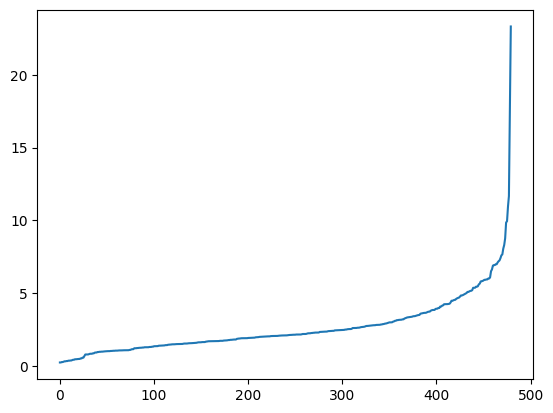

In [61]:
dist=np.sort(dist,axis=0)
dist= dist[:,1]
plt.figure()
plt.plot(dist)
# Ïó°Ïã§Î°†Ïùò ÏµúÏ†ÅÍ∞íÏùÄ K Í±∞Î¶¨ Í∑∏ÎûòÌîÑÏóêÏÑú ÏµúÎåÄ Í≥°Î•† ÏßÄÏ†êÏóê ÏûàÏúºÎ©∞ Ïù¥Í≤ΩÏö∞ 5Î°ú ÏßÄÏ†ïÌïúÎã§. 
# ÎØº Ìè¨Ïù∏Ìä∏Îäî 2Î∞∞Ïù∏ 10ÏúºÎ°ú Ï†ÅÎãπÌûà 

In [62]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# ÌëúÏ§ÄÌôî ‚Üí 2) minPts ‚âà d+1 ~ 2dÎ°ú ÏãúÏûë ‚Üí 3) **k-Í±∞Î¶¨(elbow)**Î°ú Œµ ÌõÑÎ≥¥ ‚Üí 4) **Ïã§Î£®Ïó£(ÎÖ∏Ïù¥Ï¶à Ìå®ÎÑêÌã∞)**Î°ú ÎØ∏ÏÑ∏ Ï°∞Ï†ï.
# Œµ‚ÜëÎäî Ìï©ÏπòÍ≥†, minPts‚ÜëÎäî Ï°∞Î∞ÄÎßå ÏÇ¥Î¶∞Îã§‚ÄîÏù¥ Í∞êÍ∞ÅÏúºÎ°ú ÌäúÎãùÌïòÎ©¥ Îê©ÎãàÎã§.
def dbscan_eval(X, eps, min_samples, scale=True, metric="euclidean"):
    X_used = StandardScaler().fit_transform(X) if scale else X
    lab = DBSCAN(eps=eps, min_samples=min_samples, metric=metric).fit_predict(X_used)
    mask = lab != -1
    n_noise = int((lab == -1).sum())
    n_eff = mask.sum()
    # Ïã§Î£®Ïó£ÏùÄ Ïú†Ìö® ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä 2Í∞ú Ïù¥ÏÉÅÏùº ÎïåÎßå
    if n_eff > 1 and len(set(lab[mask])) > 1:
        sil = silhouette_score(X_used[mask], lab[mask], metric=metric)
        sil_adj = sil * (n_eff / len(lab))  # ÎÖ∏Ïù¥Ï¶à Ìå®ÎÑêÌã∞(ÏÑ†ÌÉù)
    else:
        sil, sil_adj = np.nan, np.nan
    return sil, sil_adj, n_noise, lab

def dbscan_grid(X, eps_list, minpts_list, scale=True, metric="euclidean"):
    rows = []
    for m in minpts_list:
        for e in eps_list:
            sil, sil_adj, n_noise, lab = dbscan_eval(X, e, m, scale, metric)
            rows.append({
                "minPts": m, "eps": e,
                "silhouette": sil, "silhouette_adj": sil_adj,
                "n_noise": n_noise,
                "n_clusters": len(set(lab)) - (1 if -1 in lab else 0),
            })
    df = pd.DataFrame(rows)
    # Ïã§Î£®Ïó£(ÎòêÎäî Ìå®ÎÑêÌã∞ Ìè¨Ìï®)Ïùò ÏÉÅÏúÑ Ï°∞Ìï©ÏùÑ ÌôïÏù∏
    score_col = "silhouette_adj" if df["silhouette_adj"].notna().any() else "silhouette"
    return df.sort_values(score_col, ascending=False, na_position="last").reset_index(drop=True)


In [63]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

db=DBSCAN(eps=6,min_samples=10).fit(X_sp)
label=db.labels_
data=pd.DataFrame()
data["Class"]=Y_sp.copy()
data["labels"]=label
data.loc[data['labels']==1,'Class'].sum()

11

In [65]:
# -1 ÏùÄ ÏÇ¨Ïã§ Ï†ïÏÉÅÏù¥ÏßÄÎßå -1Î°ú Î∂ÑÎ•òÎêúÍ≤ΩÏö∞Í∞Ä ÎßéÏùå
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

data.loc[data.labels==-1,'labels']=1
confusion_matrix(data.Class,data.labels)
print(classification_report(data.Class,data.labels))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       420
           1       0.81      0.78      0.80        60

    accuracy                           0.95       480
   macro avg       0.89      0.88      0.88       480
weighted avg       0.95      0.95      0.95       480



In [66]:
# DBSCAN 4Î≤à Î™®Îç∏ÏóêÏÑú ÎùºÎ≤®Ïù¥ -1 Ïù¥Î©¥ÏÑú ÌÅ¥ÎûòÏä§Í∞Ä 0 Ïù∏ Í≥†Í∞ùÏùÄ ÏúÑÌóòÍµ∞ÏúºÎ°ú Î∂ÑÎ•òÌï† Ïàò ÏûàÎã§. Î∂ÑÎ•ò Ï†ïÌôïÎèÑ Îßå Î≥¥Î©¥ RFÍ∞Ä Ï¢ãÏßÄÎßå  Ïó¨Îü¨ÏºÄÏù¥Ïä§Í∞Ä ÏûàÏùÑ Í≤ΩÏö∞ Î∂ÑÎ•ò Ìï¥ÎÇ¥Í∏∞Í∞Ä Ïñ¥Î†µÎã§. 
# ÌïòÏßÄÎßå DBSCAN Í∞ôÏùÄ Í±∞Î¶¨Í∏∞Î∞ò Ïù¥ÏÉÅÌÉêÏßÄÎäî Ï†ïÏÉÅÏúºÎ°ú Î∂ÑÎ•òÎêÆÏßÄÏïäÏùÄ Ïù¥ÏÉÅÏπòÎ•º Í∞ÄÏßÄÍ≥† ÏúÑÌóò„ÖáÍµ∞ÏùÑ Í¥ÄÎ¶¨Ìï† Ïàò ÏûàÎã§.

In [67]:
# ÌÜµÍ≥Ñ 1 2ÎÖÑÏ†Ñ Ï†úÌíà ÏÉùÏÇ∞ÎüâÏù¥ 100000 1ÎÖÑÏ†Ñ ÏÉùÏÇ∞ÎüâÏù¥ 150000 Í∑∏ÌõÑ 250000 ÎêòÏóàÏùÑÎïå Ïó∞ÌèâÍ∑† ÏÉÅÏäπÏú®Ïùò Í∞úÌëØÍ∞íÏùÑ Íµ¨ÌïòÏãúÏò§
# Í∏∞Ìïò ÌèâÍ∑† 
import numpy as np 
prod_2y=100000
prod_1y=150000
prod_0y=250000
rt1=(prod_1y)/prod_2y
rt2=(prod_0y)/prod_1y
print(np.sqrt(rt1*rt2))


1.5811388300841898


In [68]:
# ÌÜµÍ≥Ñ 2 12Í±¥Ïùò Í¥ëÍ≥º ÏãúÍ∞ÑÏùÑ Ï∏°Ï†ïÌïú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌèâÍ∑†ÏùÄ 15.5s Î∂ÑÏÇ∞ÏùÄ 3.2s ÏòÄÎã§ Ïù¥Îïå Í¥ëÍ≥† ÏãúÍ∞ÑÏùò 90% Ïã†Î¢∞Íµ¨Í∞ÑÏùÄ
from scipy import stats

mu=15.5
std=3.2**0.5
dof=12-1
print(stats.t.interval(confidence=0.9,loc=15.5, scale=std,df=dof))

(12.287423572494966, 18.71257642750503)


In [69]:
# ÌÜµÍ≥Ñ 3 Í∞ïÏùò ÏÉÅÎ•òÏôÄ ÌïòÎ•ò ÏÉùÎ¨º Îã§ÏñëÏÑ± Ï†êÏàòÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ Ïú†ÏùòÏàòÏ§Ä 0.1 Ïù¥Ìïò Í≤ÄÏ†ïÌïòÏãúÏò§ ÎèÖÎ¶ΩÏ†ÅÏù¥ÏßÄ ÏïäÍ≥† Ï¢ÖÏÜçÏ†Å Í¥ÄÍ≥Ñ Ï†ïÍ∑úÏÑ±ÎßåÏ°±
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem7.csv")

In [70]:
import scipy.stats as stats

stats.ttest_rel(df['up'],df['down'])#  0.1 Ïù¥Ìïò ÎØÄÎ°ú Í∏∞Í∞Å

TtestResult(statistic=3.3526056764717995, pvalue=0.028499777234053288, df=4)

In [84]:
#ÌÜµÍ≥Ñ 4 user_countsÎ•º Ï¢ÖÏÜçÎ≥ÄÏàò 
#4-1 Î∂ÑÏúÑÏàò ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïá†Í∑Ä Í≥ÑÏàòÎ•º Íµ¨ÌïòÏãúÏò§
import pandas as pd 
import numpy as np
df_user=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem8.csv")
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import train_test_split

X=df_user[[c for c in df_user.columns if c !='user_counts']]
y=df_user[[c for c in df_user.columns if c =='user_counts']]
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=.3,)
rgr=QuantileRegressor(quantile=0.5,fit_intercept=True)
rgr.fit(X_train,Y_train)
print(df_user.head(5))
print(rgr.coef_)
print(rgr.intercept_)
print(rgr.coef_[0]*10.5)
#QuantileRegressorÎäî ‚ÄúÏ°∞Í±¥Î∂Ä ÌèâÍ∑†‚ÄùÏù¥ ÏïÑÎãàÎùº **Ï°∞Í±¥Î∂Ä Î∂ÑÏúÑÏàò(quantile)**Î•º ÏßÅÏ†ë ÏòàÏ∏°ÌïòÎäî ÏÑ†Ìòï Î∂ÑÏúÑÏàò ÌöåÍ∑ÄÏûÖÎãàÎã§. ÏÜêÏã§Î°ú ÌïÄÎ≥º(pinball) ÏÜêÏã§ÏùÑ ÏµúÏÜåÌôîÌïòÍ≥†, Í∏∞Î≥∏Ï†ÅÏúºÎ°ú **L1 Ï†ïÍ∑úÌôî(ÎùºÏèòÏãù)**Í∞Ä Í±∏Î¶ΩÎãàÎã§.
#  Í∑∏ÎûòÏÑú **Ï§ëÏïôÍ∞í ÌöåÍ∑Ä(œÑ=0.5)**ÎÇò ÏÉÅ¬∑ÌïòÏúÑ Î∂ÑÏúÑÏàòÎ•º Î∞îÎ°ú ÎßûÏ∂îÏñ¥ ÏòàÏ∏° Íµ¨Í∞ÑÏùÑ ÎßåÎì§ Îïå Ïú†Ïö©ÌïòÍ≥†, ÌèâÍ∑† ÌöåÍ∑ÄÎ≥¥Îã§ Ïù¥ÏÉÅÏπòÏóê Îçî Í≤¨Í≥†Ìï©ÎãàÎã§.
# œÑÎ•º Ïó¨Îü¨ Í∞ú(Ïòà: 0.05/0.95) ÌïôÏäµÌïòÎ©¥ 95% ÏòàÏ∏°Íµ¨Í∞ÑÏùÑ Î∞îÎ°ú ÏñªÏäµÎãàÎã§.
# QuantileRegressor(quantile=tau, alpha=1.0) 
# 2) ÏòàÏ∏°Íµ¨Í∞Ñ(Î∂ÑÏúÑÏàò Î∞¥Îìú) ÏñªÎäî Î≤ï
# from sklearn.linear import QuantileRegressor

# tau_lo, tau_hi = 0.05, 0.95
# qr_lo = QuantileRegressor(quantile=tau_lo, alpha=1.0).fit(X, y)
# qr_hi = QuantileRegressor(quantile=tau_hi, alpha=1.0).fit(X, y)

# y_lo  = qr_lo.predict(X_new)   # 5% Î∂ÑÏúÑÏàò Ï∂îÏ†ï
# y_hi  = qr_hi.predict(X_new)   # 95% Î∂ÑÏúÑÏàò Ï∂îÏ†ï
# ‚Üí [y_lo, y_hi] Í∞Ä 90% ÏòàÏ∏°Íµ¨Í∞Ñ Ïó≠Ìï†


   temperature   wind  precipitation  user_counts
0    10.400000  4.600       0.844944         6368
1     5.666667  4.625       0.040860         5902
2     4.933333  4.725       0.008696         6226
3     3.400000  2.675       0.156989         5829
4     8.900000  3.950       7.988462         7589
[208.22485207   0.           0.        ]
6125.627218934912
2186.3609467455617


/opt/homebrew/Caskroom/miniforge/base/envs/general/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
#5 ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Í≥º ÏõîÎ≥Ñ ÏäπÍ∞± ÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÏãúÏò§
#5-1 Í∑ÄÎ¨¥Í∞ÄÏÑ§Í≥º ÎåÄÎ¶ΩÍ∞ÄÏÑ§ÏùÑ ÏÑ§Ï†ïÌïòÏãúÏò§
# ÏÉÅÌò∏ ÏûëÏö©Ìö®Í≥º Í∞ÄÏÑ§
# Í∑ÄÎ¨¥ ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Í≥º ÏõîÎ≥Ñ ÏäπÍ∞ù Ïàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§.
# ÎåÄÎ¶Ω ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Í≥º ÏõîÎ≥Ñ ÏäπÍ∞ù Ïàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§.
# Ï£ºÌö®Í≥º Í∞ÄÏÑ§ 2Í∞ú
# Í∑ÄÎ¨¥ ÏßÄÌïòÏ≤† Ìò∏ÏÑ† ÏäπÍ∞ù Ïàò Ï∞®Ïù¥Îäî Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäîÎã§. 
# ÎåÄÎ¶Ω ÏßÄÌïòÏ≤† Ìò∏ÏÑ† ÏäπÍ∞ù Ïàò Ï∞®Ïù¥Îäî Ï°¥Ïû¨ÌïúÎã§.
# Í∑ÄÎ¨¥ ÏõîÎ≥Ñ ÏäπÍ∞ù Ïàò Ï∞®Ïù¥Îäî Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäîÎã§.
# ÎåÄÎ¶Ω ÏõîÎ≥Ñ ÏäπÍ∞ù Ïàò Ï∞®Ïù¥Îäî Ï°¥Ïû¨ÌïúÎã§.

import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem9.csv")
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
fomula='total ~ C(line) + C(month) + C(line):C(month)' #fomula='total ~ C(line)*C(month)'
model=ols(fomula,df).fit()
anova_results=anova_lm(model)
print(anova_results)
# Ï†ÑÎ∂Ä pvalue Í∞Ä 0.05 Ïù¥ÌïòÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
# ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Í≥º ÏõîÎ≥Ñ ÏäπÍ∞ù Ïàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§
# ÏßÄÌïòÏ≤† Ìò∏ÏÑ† ÏäπÍ∞ù Ïàò Ï∞®Ïù¥Îäî Ï°¥Ïû¨ÌïúÎã§.
# ÏõîÎ≥Ñ ÏäπÍ∞ù Ïàò Ï∞®Ïù¥Îäî Ï°¥Ïû¨ÌïúÎã§.


                    df        sum_sq       mean_sq             F        PR(>F)
C(line)            2.0  2.147444e+06  1.073722e+06  10362.998525  2.007247e-50
C(month)          11.0  3.206533e+04  2.915030e+03     28.134341  2.103496e-14
C(line):C(month)  22.0  9.696908e+04  4.407686e+03     42.540665  1.582232e-19
Residual          36.0  3.730000e+03  1.036111e+02           NaN           NaN


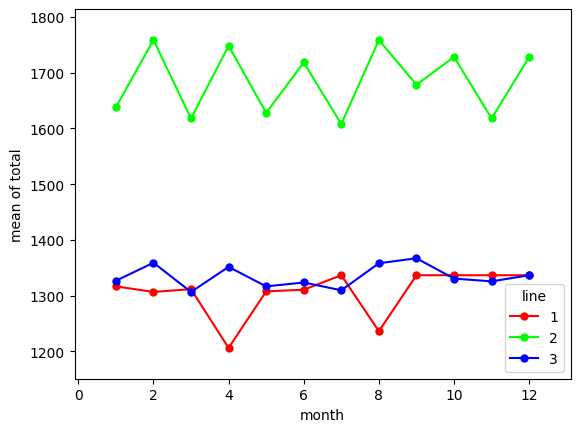

In [73]:
#ÌÉÄÏûÖ3 ÏïÑÎÖ∏Î∞îÏùò Í≤ΩÏö∞ ÏïÑÎûòÏùò ÏãúÍ∞ÅÌôî
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

total=df['total']
line=df['line']
month=df['month']
fix,ax=plt.subplots()
fit=interaction_plot(month,line,total,ax=ax,ms=10)
# Îã¨Í≥º Ìò∏ÏÑ†Ïóê Îî∞Îùº ÏäπÍ∞ùÏàòÏùò Í∑∏ÎûòÌîÑÍ∞Ä Íµê„ÖïÏ∞®ÌïòÎäî ÏßÄÏ†êÏù¥ ÏóÜÏñ¥ ÌèâÌñâÌï¥ÏïºÏßÄ Ïù∏ÌÑ∞ÎûôÏÖòÏù¥ ÏóÜÎã§Í≥† Ìï†Ïàò ÏóÜÏßÄÎßå, 
# Ïó¨Îü¨Î≤à ÍµêÏ∞®ÌïòÎØÄÎ°ú ÏÑúÎ°ú ÏÉÅÍ¥ÄÏù¥ ÏûàÎã§.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2  379.4583    0.0  349.1273  409.7894   True
     1      3   27.7917 0.0792   -2.5394   58.1227  False
     2      3 -351.6667    0.0 -381.9977 -321.3356   True
---------------------------------------------------------
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2  47.8333   1.0 -332.1532 427.8199  False
     1      3    -15.0   1.0 -394.9865 364.9865  False
     1      4   8.3333   1.0 -371.6532 388.3199  False
     1      5  -9.6667   1.0 -389.6532 370.3199  False
     1      6  23.8333   1.0 -356.1532 403.8199  False
     1      7     -9.0   1.0 -388.9865 370.9865  False
     1      8     24.0   1.0 -355.9865 403.9865  False
     1      9  33.6667   1.0 -346.3199 413.6

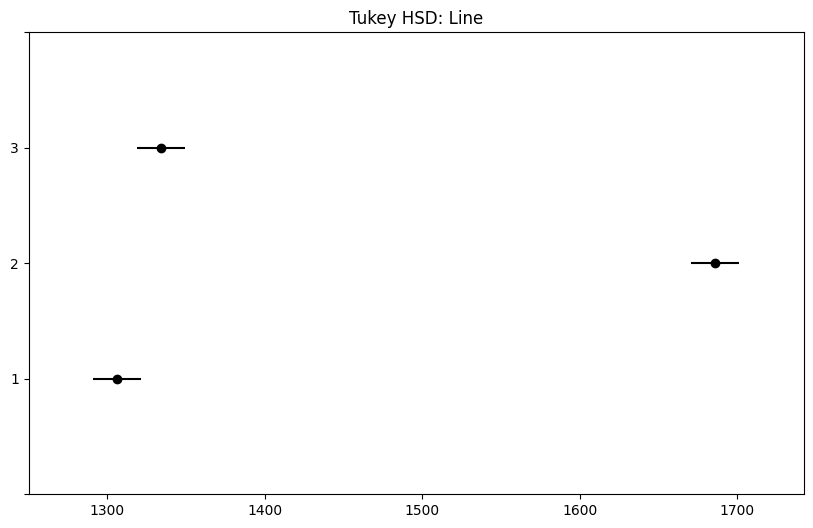

In [74]:

# --- ÏÇ¨ÌõÑÎ∂ÑÏÑù: Tukey HSD ---
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ÏòàÏãú: Ìò∏ÏÑ†Î≥ÑÎ°ú ÏõîÎ≥Ñ ÏäπÍ∞ùÏàò Ï∞®Ïù¥ ÏÇ¨ÌõÑÎ∂ÑÏÑù (line Í∏∞Ï§Ä)
tukey_line = pairwise_tukeyhsd(df['total'], df['line'])
print(tukey_line)
# ÏõîÎ≥ÑÎ°úÎèÑ Í∞ÄÎä•
tukey_month = pairwise_tukeyhsd(df['total'], df['month'])
print(tukey_month)

# ÏãúÍ∞ÅÌôî(ÏÑ†ÌÉù)
tukey_line.plot_simultaneous()
plt.title("Tukey HSD: Line")
plt.show()